In [1]:
import pandas as pd 
data_set = pd.read_csv('data_set.csv')
print(data_set.head())

   total_bill       tip  size  tip_percentage  ave_tip_per  sex_Male  \
0    0.276596  0.000000   0.2        0.029412          0.0       0.0   
1    0.148936  0.000000   0.4        0.191176          0.0       1.0   
2    0.382979  0.222222   0.4        0.191176          0.0       1.0   
3    0.425532  0.222222   0.2        0.147059          0.0       1.0   
4    0.446809  0.222222   0.6        0.161765          0.0       0.0   

   smoker_Yes  day_Sat  day_Sun  day_Thur  time_Lunch  
0         0.0      0.0      1.0       0.0         0.0  
1         0.0      0.0      1.0       0.0         0.0  
2         0.0      0.0      1.0       0.0         0.0  
3         0.0      0.0      1.0       0.0         0.0  
4         0.0      0.0      1.0       0.0         0.0  


In [2]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bill      243 non-null    float64
 1   tip             243 non-null    float64
 2   size            243 non-null    float64
 3   tip_percentage  243 non-null    float64
 4   ave_tip_per     243 non-null    float64
 5   sex_Male        243 non-null    float64
 6   smoker_Yes      243 non-null    float64
 7   day_Sat         243 non-null    float64
 8   day_Sun         243 non-null    float64
 9   day_Thur        243 non-null    float64
 10  time_Lunch      243 non-null    float64
dtypes: float64(11)
memory usage: 21.0 KB
None


In [3]:
# to kow that any column is null or not 
print(data_set.isnull().sum())

total_bill        0
tip               0
size              0
tip_percentage    0
ave_tip_per       0
sex_Male          0
smoker_Yes        0
day_Sat           0
day_Sun           0
day_Thur          0
time_Lunch        0
dtype: int64


In [4]:
target = data_set['tip']
print(target.head())

0    0.000000
1    0.000000
2    0.222222
3    0.222222
4    0.222222
Name: tip, dtype: float64


In [7]:
data= data_set.drop(columns=['tip'])
print(data.head())

   total_bill  size  tip_percentage  ave_tip_per  sex_Male  smoker_Yes  \
0    0.276596   0.2        0.029412          0.0       0.0         0.0   
1    0.148936   0.4        0.191176          0.0       1.0         0.0   
2    0.382979   0.4        0.191176          0.0       1.0         0.0   
3    0.425532   0.2        0.147059          0.0       1.0         0.0   
4    0.446809   0.6        0.161765          0.0       0.0         0.0   

   day_Sat  day_Sun  day_Thur  time_Lunch  
0      0.0      1.0       0.0         0.0  
1      0.0      1.0       0.0         0.0  
2      0.0      1.0       0.0         0.0  
3      0.0      1.0       0.0         0.0  
4      0.0      1.0       0.0         0.0  


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [33]:
from sklearn.datasets import make_regression
data , target= make_regression(n_samples=243,n_features=1 , noise = 10 , random_state=42,)

In [34]:
x_train,x_test , y_train, y_test =train_test_split(data , target, test_size=0.2 ,random_state = 42)


In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
predictions = model.predict(x_test)
print(predictions)
mse = mean_squared_error(y_test, predictions)
print('mse erroe ',{mse})

[ 30.1350892   -7.12274271  10.73099762  -9.30253166  32.33161215
  42.03690776 -75.97308887 -20.5199057  -31.79353134  44.10332362
  35.82565278 -61.48623125 -48.38786103 -18.15084779  65.70140209
  -8.85853529   3.26053146 -28.8060147   40.60276934   3.17743394
 -59.37611358 -18.91278587  28.99476757  11.51585426 -50.42398103
   9.37040917   8.44923012 -46.19947352 -21.5933134   11.08166442
  12.83198645  12.99280539  48.41107477  25.92884455  95.93339608
 -28.07467474   3.56053039  56.53565201  -2.2091345  -42.69471369
   4.15024922 -32.45012843 -18.61507343 -80.91841815  24.25226215
 -48.18630803  54.51740865 -34.45055925 -11.59283392]
mse erroe  {92.07777921774858}


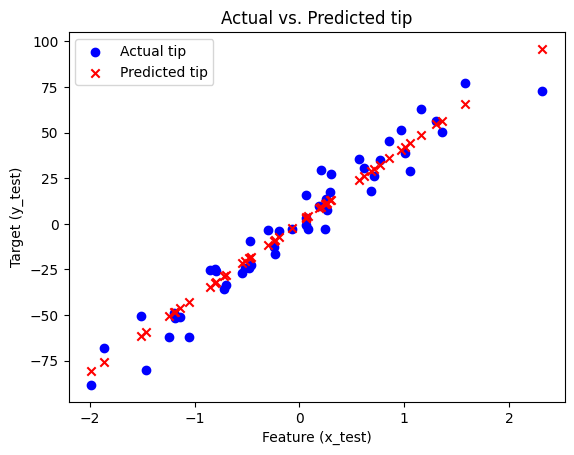

In [38]:
import matplotlib.pyplot as plt

# Ensure x_test and y_test are of the same length
if len(x_test) != len(y_test):
    print(f"Size mismatch: x_test has {len(x_test)} elements, y_test has {len(y_test)} elements")
else:
    # Scatter plot of actual vs. predicted values
    plt.scatter(x_test, y_test, color='blue', label='Actual tip')

    # Plot predicted values with markers
    plt.scatter(x_test, predictions, color='red', marker='x', label='Predicted tip')

    # Add labels, title, and legend
    plt.xlabel("Feature (x_test)")
    plt.ylabel("Target (y_test)")
    plt.title("Actual vs. Predicted tip")
    plt.legend()
    plt.show()
